In [175]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from scipy.io import loadmat as loadmat #this is the scipy module that loads .mat files

In [176]:
mpl.rc('font',size=12,weight='bold') #set default font size and weight for plots

In [177]:
CMIPmat = loadmat('area_average_trends_19572005.mat')  # load .mat file for CMIP5 model Antarctic surface air temperature time series and trends

In [178]:
AA_avg_all = CMIPmat['AA_avg_all'] #Area-average Antarctic (AA) surface air temperature for 40 CMIP5 from 1957-2005

In [179]:
AA_avg_all.dtype

dtype('<f8')

In [180]:
AA_avg_all.shape #40 CMIP5 models x 49 years (1957-2005) 

(40, 49)

In [181]:
AA_avg_all

array([[ 244.33431817,  244.07134916,  244.46510697, ...,  243.77483375,
         245.00686083,  244.52615183],
       [ 243.18314806,  242.74833561,  243.96775206, ...,  243.86073636,
         243.89626713,  243.43070348],
       [ 237.97451499,  237.03086765,  237.20415361, ...,  237.81353024,
         238.78635798,  238.39412982],
       ..., 
       [ 245.08394012,  245.68797715,  246.82771724, ...,  245.96992463,
         246.1119029 ,  246.43898527],
       [ 239.46379616,  240.05438813,  240.86210841, ...,  241.27807241,
         240.93540255,  240.2181941 ],
       [ 240.84977552,  241.28208411,  241.74169855, ...,  241.65104609,
         241.40601168,  241.5335413 ]])

In [182]:
AA_avg_all_E = CMIPmat['AA_avg_all_E'] #East AA 

In [183]:
AA_avg_all_W = CMIPmat['AA_avg_all_W'] #West AA

In [184]:
AA_avg_mmm = AA_avg_all.mean(axis=0) #average over 40 CMIP5 models (mmm = multi-model mean) 
E_AA_avg_mmm = AA_avg_all_E.mean(axis=0)
W_AA_avg_mmm = AA_avg_all_W.mean(axis=0)

In [185]:
AA_avg_std = AA_avg_all.std(axis=0) #standard deviation across 40 CMIP5 models
E_AA_avg_std = AA_avg_all_E.std(axis=0)
W_AA_avg_std = AA_avg_all_W.std(axis=0)

In [186]:
AA_avg_min = np.amin(AA_avg_all,axis=0) #minimum of 40 CMIP5 models
E_AA_avg_min = np.amin(AA_avg_all_E,axis=0)
W_AA_avg_min = np.amin(AA_avg_all_W,axis=0)
AA_avg_max = np.amax(AA_avg_all,axis=0) #maximum of 40 CMIP5 models
E_AA_avg_max = np.amax(AA_avg_all_E,axis=0)
W_AA_avg_max = np.amax(AA_avg_all_W,axis=0)

In [34]:
AA_avg_min.shape

(49,)

In [187]:
M10mat = loadmat('M10_ANN_19602005_AA_trends.mat')  # load .mat file for Monaghan et al. (2010) Antarctic surface air temperature time series reconstruction and trends

In [188]:
AA_avg_M10 = M10mat['AA_avg'] #area-averaged AA SAT 
E_AA_avg_M10 = M10mat['E_AA_avg'] #area-averaged East AA SAT 
W_AA_avg_M10 = M10mat['W_AA_avg'] #area-averaged West AA SAT 

In [38]:
ERAImat = loadmat('ERAI_19792005_AA_trends.mat')  # load .mat file for ERA-Interim Antarctic surface air temperature time series

In [189]:
AA_avg_ERAI = np.mean(ERAImat['AA_avg']) #area-averaged and climatological average (average over year 1979-2005) of ERAI AA SAT 
E_AA_avg_ERAI = np.mean(ERAImat['E_AA_avg']) #area-averaged and climatological average (average over year 1979-2005) of ERAI East AA SAT 
W_AA_avg_ERAI = np.mean(ERAImat['W_AA_avg']) #area-averaged and climatological average (average over year 1979-2005) of ERAI West AA SAT 

In [192]:
year = np.arange(1,len(AA_avg_mmm)+1,1) #create a variable called year with values 1-49, i.e. the same length as the number of year in the CMIP5 time series

In [191]:
year

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [193]:
year2 = year[3:49] #create a shorter subset of variable 'year' for the M10 time series
year3 = year[22:49] #create an even shorter subset of variable 'year' for the ERAI time series

In [123]:
AA_avg_ERAI_clim = np.full((27,1),AA_avg_ERAI)
E_AA_avg_ERAI_clim = np.full((27,1),E_AA_avg_ERAI)
W_AA_avg_ERAI_clim = np.full((27,1),W_AA_avg_ERAI)

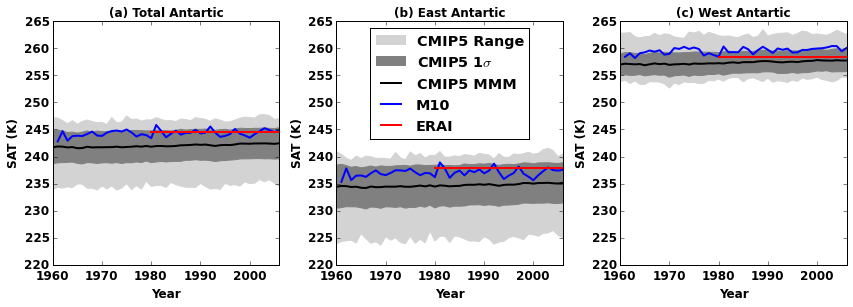

In [173]:
#big plot example
fig = plt.figure(figsize=(12,24))
ax1 = plt.subplot2grid((6,12),(0,0),colspan=4)
ax2 = plt.subplot2grid((6,12),(0,4),colspan=4)
ax3 = plt.subplot2grid((6,12),(0,8),colspan=4)

ax1.fill_between(year,AA_avg_min,AA_avg_max,facecolor = 'lightgray',edgecolor = 'lightgray')
ax1.fill_between(year,AA_avg_mmm - AA_avg_std,AA_avg_mmm + AA_avg_std,facecolor = 'gray',edgecolor = 'gray')
ax1.plot(year, AA_avg_mmm, 'k',linewidth=2)
ax1.plot(year2, AA_avg_M10.T, 'b',linewidth=2)
ax1.plot(year3, AA_avg_ERAI_clim,'r',linewidth=2)
ax1.axis([3,49,220,265])
x = np.arange(3,50,10)
ax1.set_xticks(x)
ax1.set_xticklabels([i+1957 for i in x])
ax1.set_ylabel('SAT (K)',fontsize=12,fontweight='bold')
ax1.set_xlabel('Year',fontsize=12,fontweight='bold')
ax1.set_title('(a) Total Antartic',fontsize=12,fontweight='bold')

ax2.plot([],[],color = 'lightgray',linewidth=10,label = 'CMIP5 Range')
ax2.plot([],[],color = 'gray',linewidth=10,label = 'CMIP5 1$\sigma$')
ax2.fill_between(year,E_AA_avg_min,E_AA_avg_max,facecolor = 'lightgray',edgecolor = 'lightgray')
ax2.fill_between(year,E_AA_avg_mmm - E_AA_avg_std,E_AA_avg_mmm + E_AA_avg_std,facecolor = 'gray',edgecolor = 'gray')
ax2.plot(year, E_AA_avg_mmm, 'k',label = 'CMIP5 MMM',linewidth=2)
ax2.plot(year2, E_AA_avg_M10.T, 'b',label = 'M10',linewidth=2)
ax2.plot(year3, E_AA_avg_ERAI_clim,'r',label = 'ERAI',linewidth=2)
ax2.axis([4,49,220,265])
ax2.set_xticks(x)
ax2.set_xticklabels([i+1957 for i in x])
ax2.set_ylabel('SAT (K)',fontsize=12,fontweight='bold')
ax2.set_xlabel('Year',fontsize=12,fontweight='bold')
ax2.set_title('(b) East Antartic',fontsize=12,fontweight='bold')
ax2.legend(loc='upper center')

ax3.fill_between(year,W_AA_avg_min,W_AA_avg_max,facecolor = 'lightgray',edgecolor = 'lightgray')
ax3.fill_between(year,W_AA_avg_mmm - W_AA_avg_std,W_AA_avg_mmm + W_AA_avg_std,facecolor = 'gray',edgecolor = 'gray')
ax3.plot(year, W_AA_avg_mmm, 'k',linewidth=2)
ax3.plot(year2, W_AA_avg_M10.T, 'b',linewidth=2)
ax3.plot(year3, W_AA_avg_ERAI_clim,'r',linewidth=2)
ax3.axis([4,49,220,265])
ax3.set_xticks(x)
ax3.set_xticklabels([i+1957 for i in x])
ax3.set_ylabel('SAT (K)',fontsize=12,fontweight='bold')
ax3.set_xlabel('Year',fontsize=12,fontweight='bold')
ax3.set_title('(c) West Antartic',fontsize=12,fontweight='bold')

plt.tight_layout()